In [1]:
#import pandas, numpy, os, matplotlib, seaborn, scrpy libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
path = r'C:\Users\joelf\OneDrive\Documents\CareerFoundry\4 Python\Instacart Data'

In [2]:
#1
#import data
dffinal_morethan5 = pd.read_pickle(os.path.join(path, 'NewDataSets', 'FinalDataFrame_MoreThan5Orders.pkl'))
departments = pd.read_csv(os.path.join(path, 'NewDataSets', 'departments_wrangled.csv'))
dffinal_morethan5.shape

(30964564, 41)

In [3]:
#left join to get dep names, recheck shape
dffinal_morethan5_departmentnames = dffinal_morethan5.merge(departments, on = 'department_id', how = 'left')
dffinal_morethan5_departmentnames.shape


(30964564, 42)

Creating table dffinal_morethan5_distinct_user with certain columns so I can look at non-number of order specific data
For example avg product price by loyalty group needs one row per user_id

In [4]:
#count unique user_id to compare with rows after creating new dataset
dffinal_morethan5['user_id'].nunique()

162631

In [5]:
#create dataset with each user_id in only 1 line with other descriptor flags
dffinal_morethan5_distinct_user = dffinal_morethan5[['user_id', 'avg_price','loyalty_flag','region','age_group','marital_status','num_dpdnts','max_order','economic_class']]
dffinal_morethan5_distinct_user = dffinal_morethan5_distinct_user.drop_duplicates()
dffinal_morethan5_distinct_user.shape

(162631, 9)

In [26]:
pd.options.display.max_columns = None
dffinal_morethan5.head(4)

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,repeat_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,two_busiest_days,busiest_hours,max_order,loyalty_flag,avg_price,spender_flag,med_order_freq,freq_flag,gender,state,age,date_joined,num_dpdnts,marital_status,income,_merge,day,region,more_than_5_orders,parent,economic_class,age_group,pets_flag,bulk_flag,baby_flag
0,2539329,1,1,2,8,NaN,0,196,1,0,Soda,77,7,9.0,mid_range product,normal day,normal day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Monday,South,1.0,1.0,lower,adult,0.0,0.0,0.0
1,2398795,1,2,3,7,15.0,1,196,1,1,Soda,77,7,9.0,mid_range product,normal day,slowest day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Tuesday,South,1.0,1.0,lower,adult,0.0,0.0,0.0
2,473747,1,3,3,12,21.0,1,196,1,1,Soda,77,7,9.0,mid_range product,normal day,slowest day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Tuesday,South,1.0,1.0,lower,adult,0.0,0.0,0.0
3,2254736,1,4,4,7,29.0,1,196,1,1,Soda,77,7,9.0,mid_range product,slowest day,slowest day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Wednesday,South,1.0,1.0,lower,adult,0.0,0.0,0.0


Visualizations for Final Report

Text(0, 0.5, 'Avg Price')

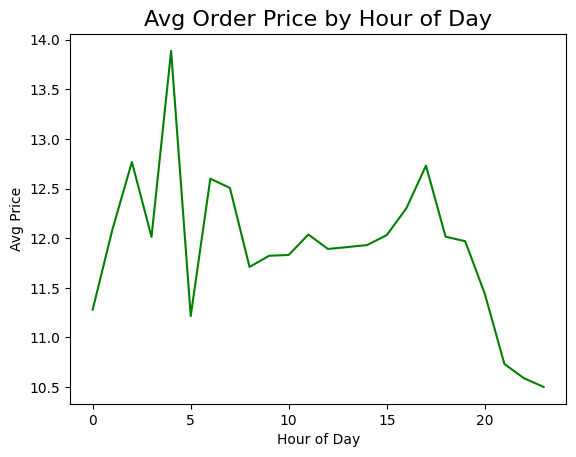

In [47]:
#question 2
#avg price by hour
table_avgprice_byhour = dffinal_morethan5.groupby('order_time').agg({'avg_price' : 'mean'})
avgprice_byhour = table_avgprice_byhour.plot(kind = 'line', color = 'green')
plt.title('Avg Order Price by Hour of Day', fontsize = 16)
plt.legend('',frameon = False)
plt.xlabel('Hour of Day')
plt.ylabel('Avg Price')

Text(0, 0.5, '')

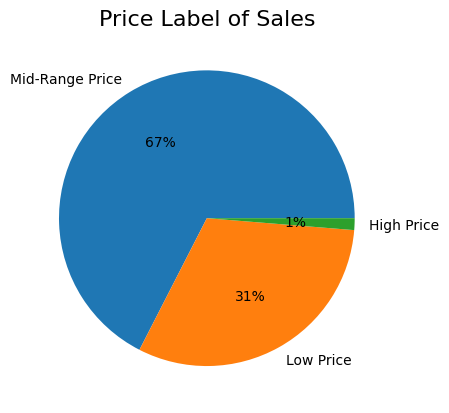

In [28]:
#question 3
pricelabel_pie = dffinal_morethan5['price_label'].value_counts().plot.pie(labels = ['Mid-Range Price', 'Low Price', 'High Price'],autopct=('%1.f%%'))
plt.title('Price Label of Sales', fontsize = 16)
plt.ylabel('')

Text(0.5, 0, '')

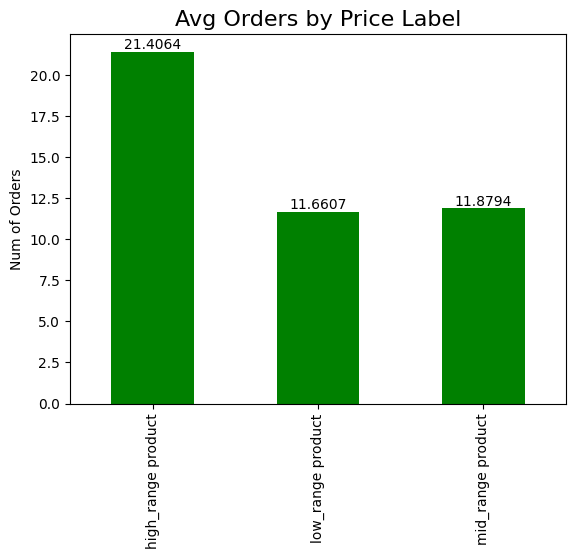

In [31]:
#3
table_pricelabel_bar = dffinal_morethan5.groupby('price_label').agg({'avg_price': 'mean'})
pricelabel_bar = table_pricelabel_bar.plot(kind = 'bar', color = 'green')
plt.title('Avg Orders by Price Label', fontsize = 16)
plt.legend('',frameon = False)
plt.bar_label(pricelabel_bar.containers[0])
plt.ylabel('Num of Orders')
plt.xlabel('')

Text(0, 0.5, 'Number of Orders')

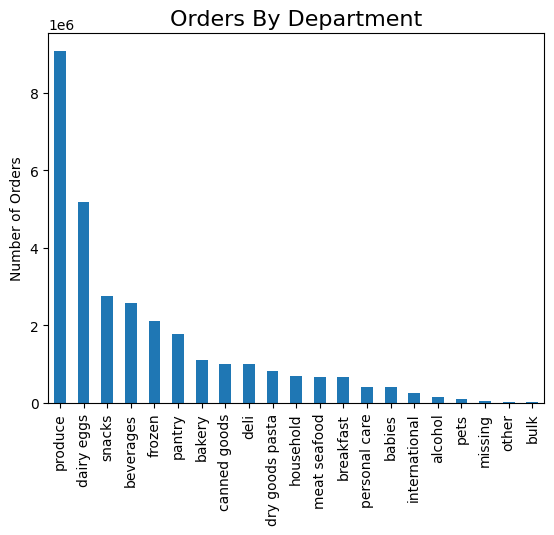

In [51]:
#question 4
#most popular departments
popular_departments_bar = dffinal_morethan5_departmentnames['department'].value_counts().plot.bar()
plt.title('Orders By Department', fontsize = 16)
plt.ylabel('Number of Orders')

Text(0, 0.5, '')

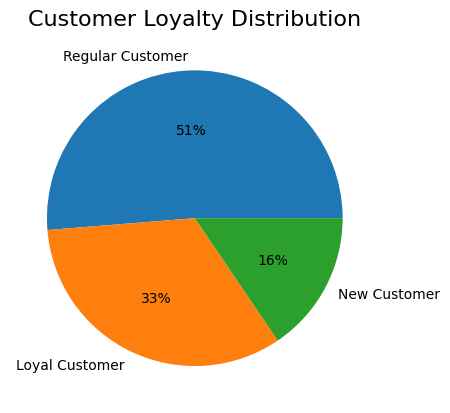

In [52]:
#question 5
customerdist_pie = dffinal_morethan5['loyalty_flag'].value_counts().plot.pie(autopct=('%1.f%%'))
plt.title('Customer Loyalty Distribution', fontsize = 16)
plt.ylabel('')

Text(0, 0.5, 'Price')

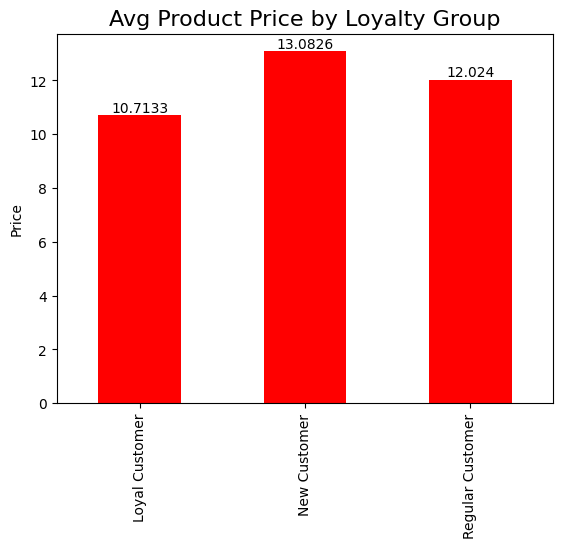

In [53]:
#question 5
table_avgprice_byloyalty = dffinal_morethan5_distinct_user.groupby('loyalty_flag').agg({'avg_price': 'mean'})
avg_price_by_loyalty_group = table_avgprice_byloyalty.plot(kind = 'bar', color = 'red')
plt.title('Avg Product Price by Loyalty Group', fontsize = 16)
plt.legend('',frameon = False)
plt.bar_label(avg_price_by_loyalty_group.containers[0])
plt.xlabel('')
plt.ylabel('Price')


Text(0.5, 0, '')

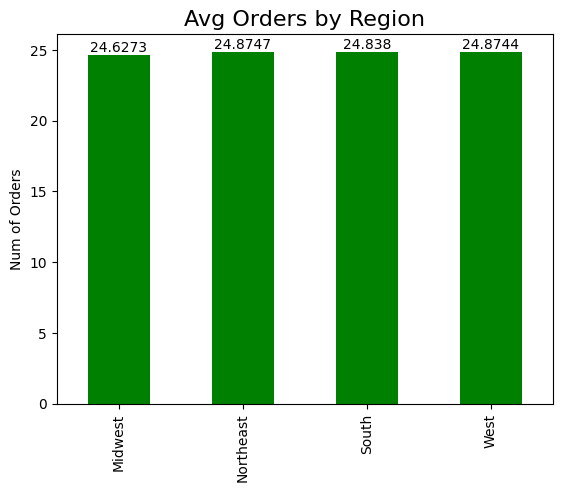

In [61]:
#question 6
table_avgnum_orders_byregion = dffinal_morethan5_distinct_user.groupby('region').agg({'max_order': 'mean'})
avg_num_orders_by_region = table_avgnum_orders_byregion.plot(kind = 'bar', color = 'green')
plt.title('Avg Orders by Region', fontsize = 16)
plt.legend('',frameon = False)
plt.bar_label(avg_num_orders_by_region.containers[0])
plt.ylabel('Num of Orders')
plt.xlabel('')

Text(0.5, 0, '')

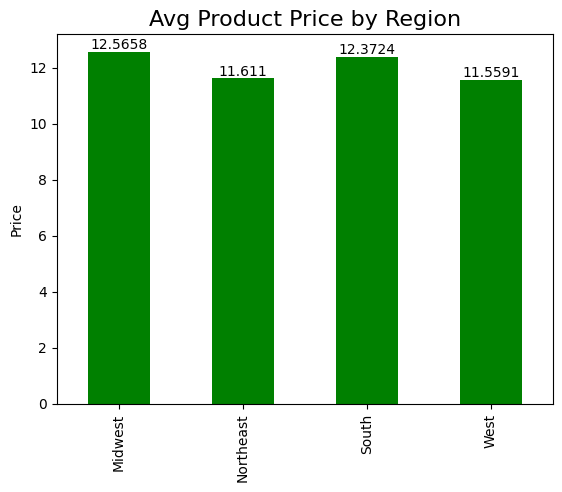

In [62]:

#question 6
table_avgprice_byregion = dffinal_morethan5_distinct_user.groupby('region').agg({'avg_price': 'mean'})
avg_price_by_region = table_avgprice_byregion.plot(kind = 'bar', color = 'green')
plt.title('Avg Product Price by Region', fontsize = 16)
plt.legend('', frameon = False)
plt.bar_label(avg_price_by_region.containers[0])
plt.ylabel('Price')
plt.xlabel('')

Text(0.5, 0, '')

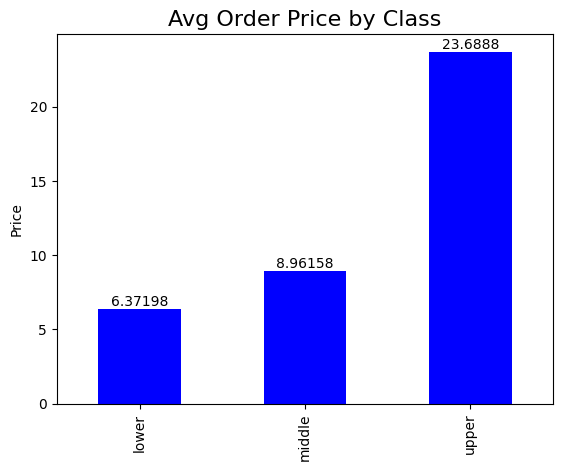

In [66]:
#question 6
table_avgorder_byclass = dffinal_morethan5_distinct_user.groupby('economic_class').agg({'avg_price': 'mean'})
avg_order_by_class = table_avgorder_byclass.plot(kind = 'bar', color = 'blue')
plt.title('Avg Order Price by Class', fontsize = 16)
plt.legend('', frameon = False)
plt.bar_label(avg_order_by_class.containers[0])
plt.ylabel('Price')
plt.xlabel('')

Text(0.5, 0, '')

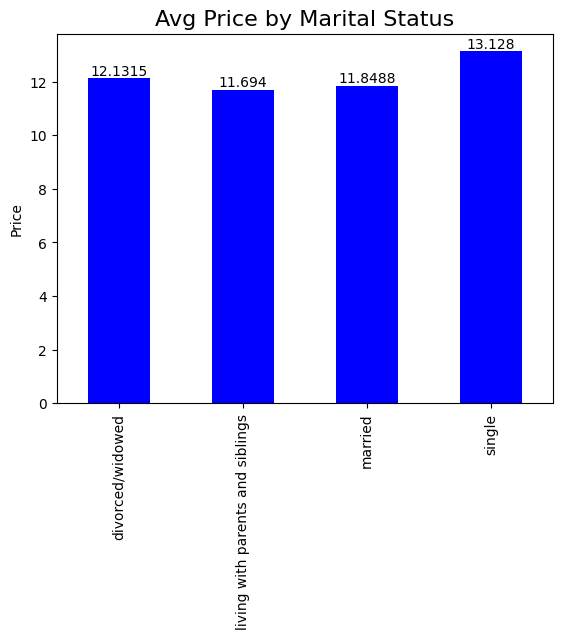

In [65]:
#6
table_avgprice_bymarital = dffinal_morethan5_distinct_user.groupby('marital_status').agg({'avg_price': 'mean'})
avg_price_by_marital = table_avgprice_bymarital.plot(kind = 'bar', color = 'blue')
plt.title('Avg Price by Marital Status', fontsize = 16)
plt.legend('', frameon = False)
plt.bar_label(avg_price_by_marital.containers[0])
plt.ylabel('Price')
plt.xlabel('')

In [69]:
#Export charts
#2
avgprice_byhour.figure.savefig(os.path.join(path, 'NewDataSets', '4.10 Vis', 'avgprice_byhour.png'))
#3
pricelabel_pie.figure.savefig(os.path.join(path, 'NewDataSets', '4.10 Vis', 'pricelabel_pie.png'))
#4
popular_departments_bar.figure.savefig(os.path.join(path, 'NewDataSets', '4.10 Vis', 'popular_departments_bar.png'))
#5
customerdist_pie.figure.savefig(os.path.join(path, 'NewDataSets', '4.10 Vis', 'customerdist_pie.png'))
avg_price_by_loyalty_group.figure.savefig(os.path.join(path, 'NewDataSets', '4.10 Vis', 'avg_price_by_loyalty_group.png'))
#6
avg_num_orders_by_region.figure.savefig(os.path.join(path, 'NewDataSets', '4.10 Vis', 'avg_num_orders_by_region.png'))
avg_price_by_region.figure.savefig(os.path.join(path, 'NewDataSets', '4.10 Vis', 'avg_price_by_region.png'))
avg_order_by_class.figure.savefig(os.path.join(path, 'NewDataSets', '4.10 Vis', 'avg_order_by_class.png'))
avg_price_by_marital.figure.savefig(os.path.join(path, 'NewDataSets', '4.10 Vis', 'avg_price_by_marital.png'))


In [ ]:
dffinal_morethan5_distinct_user.to_pickle(os.path.join(path, 'NewDataSets', 'FinalDataFrame_MoreThan5_DistinctUser.pkl'))